# Propagation of electromagnetic fields

Ian Spielman 20Oct2013

In this notebook, I study the propagation of light through a two-level atomic ensemble.  This uses the "FieldPropagate.py" module.  This is a generally useful tool, which for example can be used to locate dust in imaging systems, or more complex things.  I was motivated to write this tool to support an experiment which Abby Perry is working on, focusing on holagraphic recovery of atomic density distributions, using three defocused images.

## Basic include files

In [3]:
%matplotlib inline
import sys
sys.path.append(r'\Users\Banano\Documents\UMD\Research')
# import qgas.Utils
import qgas.Process
import qgas.Functions
import qgas.Simulation.FieldPropagate as FieldPropagate
import qgas.ImageProcessing as ImProc

import matplotlib
import numpy
import scipy

import sys
sys.version_info

ModuleNotFoundError: No module named 'qgas.NumericalTools'

# Quick use of field propogate to see focusing effects of a small object

In [30]:
Detuning = 0.0
ISat = 16000

# Initilize the field propogation object
Field = FieldPropagate.ScalarField()
Field.SetWavelength(0.780)
Field.SetISat(ISat)
Field.MaxSpatialFrequency = 0.5 # 2 micron resolution
Field.SetDetuning(Detuning)

# Grid size
xSize = 512
ySize = 512
dx = 1.0

Field.dims = [
    {"x0": -dx * xSize/2, "dx": dx, "npnts": xSize, "unit": "x Position"},
    {"x0": -dx * ySize/2, "dx": dx, "npnts": ySize, "unit": "y Position"}]

# Initilize field variables and arrays
Field.InitFields()

# Make a sample absorber
parmsGaussTF = (
         0.0,
         0.00,
         0.8,
         0.0,
         100.,
         100.,
         0.0,
         4,
         4.,
         0.0,
         4.,
         4.
         )

DensityObj = qgas.Functions.GaussThomasFermi3DSlice()
Density  = DensityObj.MakeFunctionSingleExtract(10, parmsGaussTF)
Field.SetDensity(Density)

# make a trial image (intensity of a Gaussian beam
parmsGauss2D = (
         0.0,
         1200,
         0.0,
         100,
         0.0,
         100
         )

LaserObj = qgas.Functions.Gauss2D();
Laser = LaserObj.f(Field._Dimensions.RangeArrays, parmsGauss2D);
# Initilize a field propagation object

Field.BaseMagnitude = Laser
Field.ResetFields()

Field.SetReadNoiseCounts(10)
Field.SetSingleClickCounts(0.85)

Field.SplitStep(z0=-4, z1=4, dz=0.1)

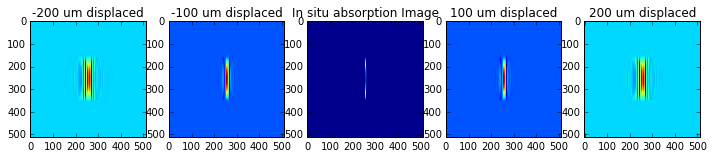

In [31]:
fig = matplotlib.pyplot.figure(figsize=(12,6));


Field.FieldUpdate(-200, Absolute = True);
Image = Field.GetCurrentMagnitude(ModelDetector = False, ReturnFract = True, ReturnOD=True)
ax=fig.add_subplot(151);
ax.set_title("-200 um displaced")
ax.imshow(Image)

Field.FieldUpdate(-100, Absolute = True);
ax=fig.add_subplot(152);
ax.set_title("-100 um displaced")
Image = Field.GetCurrentMagnitude(ModelDetector = False, ReturnFract = True, ReturnOD=True)
ax.imshow(Image)

Field.FieldUpdate(0, Absolute = True);
ax=fig.add_subplot(153);
ax.set_title("In situ absorption Image")
Image = Field.GetCurrentMagnitude(ModelDetector = False, ReturnFract = True, ReturnOD=True)
ax.imshow(Image)

Field.FieldUpdate(100, Absolute = True);
Image = Field.GetCurrentMagnitude(ModelDetector = False, ReturnFract = True, ReturnOD=True)
ax=fig.add_subplot(154);
ax.set_title("100 um displaced")
ax.imshow(Image)

Field.FieldUpdate(200, Absolute = True);
Image = Field.GetCurrentMagnitude(ModelDetector = False, ReturnFract = True, ReturnOD=True)
ax=fig.add_subplot(155);
ax.set_title("200 um displaced")
ax.imshow(Image)

In [32]:
# Displacement cuts

displacements = numpy.linspace(-300,300,128)

slices = []
for displacement in displacements:
    Field.FieldUpdate(displacement, Absolute = True)
    Img = Field.GetCurrentMagnitude(ModelDetector = False, ReturnFract = True, ReturnOD=True)
    slices += [Img[numpy.floor(ySize/2), numpy.floor(xSize*0.4):numpy.floor(xSize*0.6)],]

slices = numpy.array(slices)

/Users/ispielma/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


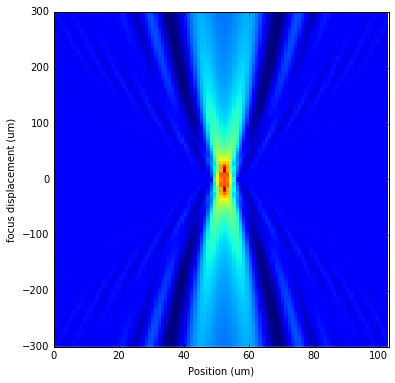

In [33]:
fig = matplotlib.pyplot.figure(figsize=(6,6))
ax=fig.add_subplot(111)
ax.imshow(slices, extent=[0,slices.shape[1],-300,300],aspect='auto', interpolation='none')
ax.set_xlabel("Position (um)")
ax.set_ylabel("focus displacement (um)")

In [42]:
# Displacement cuts at one linewidth of detuning
Field.SetDetuning(1.0)
Field.BaseMagnitude = Laser
Field.ResetFields()
Field.SplitStep(z0=-4, z1=4, dz=0.1)

displacements = numpy.linspace(-300,300,128)

slices = []
for displacement in displacements:
    Field.FieldUpdate(displacement, Absolute = True)
    Img = Field.GetCurrentMagnitude(ModelDetector = False, ReturnFract = True, ReturnOD=True)
    slices += [Img[numpy.floor(ySize/2), numpy.floor(xSize*0.4):numpy.floor(xSize*0.6)],]

slices = numpy.array(slices)

/Users/ispielma/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


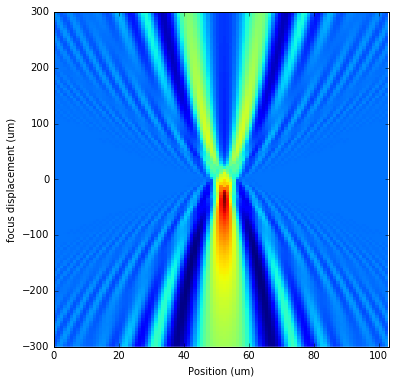

In [43]:
fig = matplotlib.pyplot.figure(figsize=(6,6))
ax=fig.add_subplot(111)
ax.imshow(slices, extent=[0,slices.shape[1],-300,300],aspect='auto', interpolation='none')
ax.set_xlabel("Position (um)")
ax.set_ylabel("focus displacement (um)")

In [39]:
# I can also plot what the in-focus images look like as a function of detuning.

detunings = numpy.linspace(-2,2,64)

slices = []
for detuning in detunings:
    Field.SetDetuning(detuning)
    Field.BaseMagnitude = Laser
    Field.ResetFields()
    Field.SplitStep(z0=-4, z1=4, dz=0.1)

    Field.FieldUpdate(0.0, Absolute = True)
    Img = Field.GetCurrentMagnitude(ModelDetector = False, ReturnFract=True, ReturnOD=True).copy()
    slices += [Img[numpy.floor(ySize/2), numpy.floor(xSize*0.45):numpy.floor(xSize*0.55)],]

slices = numpy.array(slices)

/Users/ispielma/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


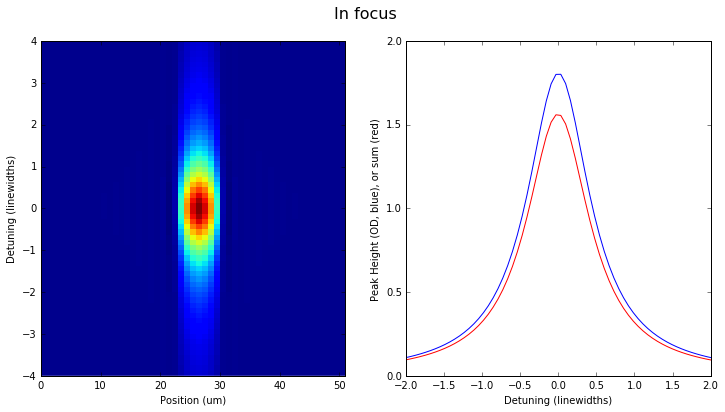

In [35]:
height = numpy.array([slice.max() for slice in slices])
total = numpy.array([slice.sum() for slice in slices])

fig = matplotlib.pyplot.figure(figsize=(12,6))
fig.suptitle("In focus", size=16)

ax=fig.add_subplot(121)
ax.imshow(slices, extent=[0,slices.shape[1],-4,4],aspect='auto', interpolation='none')
ax.set_xlabel("Position (um)")
ax.set_ylabel("Detuning (linewidths)")

ax=fig.add_subplot(122)
ax.plot(detunings, height)
ax.plot(detunings, total/6, "r")
ax.set_ylabel("Peak Height (OD, blue), or sum (red)")
ax.set_xlabel("Detuning (linewidths)")

So we learn that the signal is peaked on resonance, in focus

In [36]:
# I can also plot what the out of focus-focus images look like as a function of detuning.

detunings = numpy.linspace(-2,2,64)

slices = []
for detuning in detunings:
    Field.SetDetuning(detuning)
    Field.BaseMagnitude = Laser
    Field.ResetFields()
    Field.SplitStep(z0=-4, z1=4, dz=0.1)

    Field.FieldUpdate(50.0, Absolute = True)
    Img = Field.GetCurrentMagnitude(ModelDetector = False, ReturnFract=True, ReturnOD=True).copy()
    slices += [Img[numpy.floor(ySize/2), numpy.floor(xSize*0.45):numpy.floor(xSize*0.55)],]

slices = numpy.array(slices)

/Users/ispielma/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


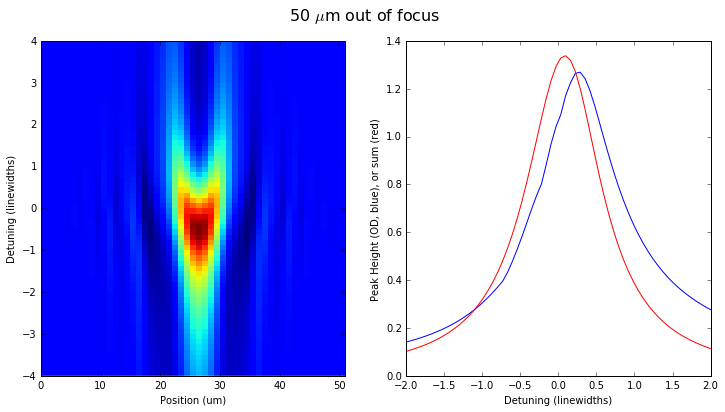

In [37]:
height = numpy.array([slice.max() for slice in slices])
total = numpy.array([slice.sum() for slice in slices])

fig = matplotlib.pyplot.figure(figsize=(12,6))
fig.suptitle("50 $\mu$m out of focus", size=16)

ax=fig.add_subplot(121)
ax.imshow(slices, extent=[0,slices.shape[1],-4,4],aspect='auto', interpolation='none')
ax.set_xlabel("Position (um)")
ax.set_ylabel("Detuning (linewidths)")

ax=fig.add_subplot(122)
ax.plot(detunings, height)
ax.plot(detunings, total/6, "r")
ax.set_ylabel("Peak Height (OD, blue), or sum (red)")
ax.set_xlabel("Detuning (linewidths)")

Totally different behavior out of focus.  Given this degree of detuning, we can see what the traces versus position would look like.

In [44]:
# Displacement cuts at some non-zero detuning as would have been computed from a defocused image.
Field.SetDetuning(0.25)
Field.BaseMagnitude = Laser
Field.ResetFields()
Field.SplitStep(z0=-4, z1=4, dz=0.1)

displacements = numpy.linspace(-300,300,128)

slices = []
for displacement in displacements:
    Field.FieldUpdate(displacement, Absolute = True)
    Img = Field.GetCurrentMagnitude(ModelDetector = False, ReturnFract = True, ReturnOD=True)
    slices += [Img[numpy.floor(ySize/2), numpy.floor(xSize*0.4):numpy.floor(xSize*0.6)],]

slices = numpy.array(slices)

/Users/ispielma/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


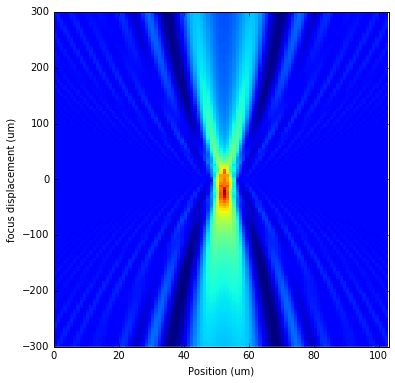

In [45]:
fig = matplotlib.pyplot.figure(figsize=(6,6))
ax=fig.add_subplot(111)
ax.imshow(slices, extent=[0,slices.shape[1],-300,300],aspect='auto', interpolation='none')
ax.set_xlabel("Position (um)")
ax.set_ylabel("focus displacement (um)")

# Example use of FieldPropagate.py

In [18]:
Detuning = -4;
ISat = 600;

# Initilize the field propogation object
Field = FieldPropagate.ScalarField();
Field.SetWavelength(0.780);
Field.SetISat(ISat);
Field.MaxSpatialFrequency = 0.2 # 5 micron resolution
Field.SetDetuning(Detuning);

# Grid size
xSize = 512; ySize = 512; dx = 1.9;

Field.dims = [
    {"x0": -dx * xSize/2, "dx": 1.9, "npnts": xSize, "unit": "x Position"},
    {"x0": -dx * ySize/2, "dx": 1.9, "npnts": ySize, "unit": "y Position"}]

# Initilize field variables and arrays
Field.InitFields();

# Make a sample absorber
parmsGaussTF = (
         0.0,
         0.01,
         0.8,
         0.0,
         100.,
         30.,
         0.0,
         100,
         15.,
         0.0,
         100.,
         30.
         );

DensityObj = qgas.Functions.GaussThomasFermi3DSlice();
Density  = DensityObj.MakeFunctionSingleExtract(10, parmsGaussTF);
Field.SetDensity(Density);

# make a trial image (intensity of a Gaussian beam
parmsGauss2D = (
         0.0,
         1200,
         0.0,
         300,
         0.0,
         300
         )

LaserObj = qgas.Functions.Gauss2D();
Laser = LaserObj.f(Field._Dimensions.RangeArrays, parmsGauss2D);
# Initilize a field propagation object

Field.BaseMagnitude = Laser
Field.ResetFields()

Field.SetReadNoiseCounts(10)
Field.SetSingleClickCounts(0.85)

Field.SplitStep(z0=-20, z1=20, dz=2)

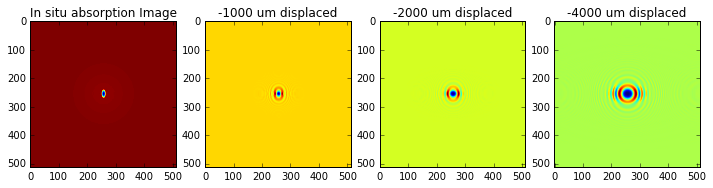

In [20]:
fig = matplotlib.pyplot.figure(figsize=(12,6));

Field.FieldUpdate(0, Absolute = True);
ax=fig.add_subplot(141);
ax.set_title("In situ absorption Image")
Image0 = Field.GetCurrentMagnitude(ModelDetector = False, ReturnFract = True);
ax.imshow(Image0)

Field.FieldUpdate(-1000, Absolute = True);
Image1 = Field.GetCurrentMagnitude(ModelDetector = False, ReturnFract = True);
ax=fig.add_subplot(142);
ax.set_title("-1000 um displaced")
ax.imshow(Image1)

Field.FieldUpdate(-2000, Absolute = True);
Image2 = Field.GetCurrentMagnitude(ModelDetector = False, ReturnFract = True);
ax=fig.add_subplot(143);
ax.set_title("-2000 um displaced")
ax.imshow(Image2)

Field.FieldUpdate(-4000, Absolute = True);
Image3 = Field.GetCurrentMagnitude(ModelDetector = False, ReturnFract = True);
ax=fig.add_subplot(144);
ax.set_title("-4000 um displaced")
ax.imshow(Image3)


## Use these three images for the contrast-transfer recovery

In [ ]:
Fields = FieldPropagate.ContrastTransferRecovery();
Fields.SetDimensions(Dimensions);

# Add fields.  Dimensions must already be set.
Fields.AddMagnitude(Image1, 1000);
Fields.AddMagnitude(Image2, 2000);
Fields.AddMagnitude(Image3, 4000);

# Paramters for all fields
Fields.SetWavelength(0.780);
Fields.SetISat(ISat);
Fields.SetDetuning(Detuning);
Fields.MaxSpatialFrequency = 0.2 # 5 micron resolution
Fields.SetMaxRadius(350, Width = 50, Value = 1); # Remove data outside a 300 um radius, with a smoothed edge with 
Fields.DoSpatialFilter();

In [ ]:
# Do Update!

fig = matplotlib.pyplot.figure(figsize=(12,6));

Fields.FieldUpdate(Distances = [0,0,0]);
ax1=fig.add_subplot(141);
ax1.set_title("Image 2: Raw")
Fields.imshowMagnitude(Fields.Images[2]["Image"], ax = ax1);

ax1=fig.add_subplot(142);
ax1.set_title("Image 2: Base Position")
Fields.imshowMagnitude(Fields.Images[2]["Shift"], ax = ax1);

Fields.FieldUpdate(Distances = [-1000/2,-2000/2,-4000/2]);
ax1=fig.add_subplot(143);
ax1.set_title("Image 2: -2000 um")
Fields.imshowMagnitude(Fields.Images[2]["Shift"], ax = ax1);

Fields.FieldUpdate(Distances = [-1000,-2000,-4000]);
ax1=fig.add_subplot(144);
ax1.set_title("Image 2: -4000 um")
Fields.imshowMagnitude(Fields.Images[2]["Shift"], ax = ax1);

In [ ]:
# Do Update!
Fields.FieldUpdate()

fig = matplotlib.pyplot.figure(figsize=(12,6));

ax1=fig.add_subplot(141);
ax1.set_title("Three Image Reconstruction")
Fields.imshowMagnitude(Fields.CurrentMagnitude, ax = ax1);

ax1=fig.add_subplot(142);
ax1.set_title("-1000 um reconstruction")
Fields.imshowMagnitude(Fields.Images[0]["Shift"], ax = ax1);

# Reconstructed image and phase
ax1=fig.add_subplot(143);
ax1.set_title("-2000 um reconstruction")
Fields.imshowMagnitude(Fields.Images[1]["Shift"], ax = ax1);

ax1=fig.add_subplot(144);
ax1.set_title("-4000 um reconstruction")
Fields.imshowMagnitude(Fields.Images[2]["Shift"], ax = ax1);

In [ ]:
# Now reconstruct some actual data
%matplotlib inline
%cd ~/Python/PythonAnalysis/2014_06_02_ImageReconstructionData/

from qgas.UserTools import FileNameTuple;
import qgas.ImageProcessing as ImProc
from Anal_Images import BatchProcess

FileNames = ("/home/ispielma/Documents/data/RbChip/2014/May/29/3xFlea3_29May2014_0321.ibw",);
# FileNames = FileNameTuple(
#    ("/home/ispielma/Documents/data/RbChip/2014/May/29/3xFlea3_",),
#    (320,),
#    (329,),
#    Extension = ".ibw");

Fields = BatchProcess(FileNames);BatchProcess(FileNames);

## Use these images and setup phase recovery algorithm.

In [ ]:
Fields = FieldPropagate.FocusDiversityPhaseRecovery();
Fields.SetDimensions(Dimensions);

# Build images for reconstruction
Field.FieldUpdate(0, Absolute = True);
Image1 = Field.GetCurrentMagnitude(ModelDetector = True);

Field.FieldUpdate(3800, Absolute = True);
Image2 = Field.GetCurrentMagnitude(ModelDetector = True);

Field.FieldUpdate(7200, Absolute = True);
Image3 = Field.GetCurrentMagnitude(ModelDetector = True);

# Add fields.  Dimensions must already be set.
Fields.AddMagnitude(Image1, 0);
Fields.AddMagnitude(Image2, 3800);
Fields.AddMagnitude(Image3, 7200);

In [ ]:
# Local Paramters
Fields.SetBasePosition(0);
Fields.SetDamping(0.1);
Fields.SetLoops(1000);

# Paramters for all fields
Fields.SetWavelength(0.780, All = True);
Fields.SetISat(ISat, All = True);
Fields.SetDetuning(Detuning, All = True);
Fields.SetMaxSpatialFrequency(0.2, All = True); # 5 micron resolution

Fields.RecoverPhase(Status = 100, Loops = 2001, Damping = 0.1);

In [ ]:
fig = matplotlib.pyplot.figure(figsize=(12,12));

# Initial image and phase
Field.FieldUpdate(0, Absolute = True, MakeCurrentPhase = True);

ax1=fig.add_subplot(221);
Field.imshowMagnitude(Field.GetCurrentMagnitude(ModelDetector = True), ax = ax1);

ax1=fig.add_subplot(222);
Field.imshowMagnitude(Field.CurrentPhase, ax = ax1);

# Reconstructed image and phase
ax1=fig.add_subplot(223);
Fields.imshowMagnitude(Fields.BaseMagnitude, ax = ax1);

ax1=fig.add_subplot(224);
Fields.imshowMagnitude(Fields.BasePhase, ax = ax1);

And it works!  

Now I need to add functionality that allows for slight shifts of the BaseImages, but within the error estimates provided by the detector model.

# What does a very small dense object look like

In [ ]:
# Initilize the field propogation object
Field = FieldPropagate.ScalarField();
Field.SetWavelength(0.780);
Field.SetISat(300);
Field.MaxSpatialFrequency = 0.2 # 5 micron resolution
Field.SetDetuning(-0.0);

# Grid size
xSize = 512; ySize = 512; dx = 1.9;
Dimensions = [
    {"x0": -dx * xSize/2, "dx": 1.9, "npnts": xSize, "unit": "x Position"},
    {"x0": -dx * ySize/2, "dx": 1.9, "npnts": ySize, "unit": "y Position"}]

Field.SetDimensions(Dimensions);

# Initilize field variables and arrays
Field.InitFields();

# Make a sample absorber
parmsGaussTF = (
         0.0,
         0.001,
         0.08,
         0.0,
         100.,
         20.,
         0.0,
         100,
         20.,
         0.0,
         100.,
         10.
         );

DensityObj = qgas.Functions.GaussThomasFermi3DSlice();
Density  = DensityObj.MakeFunctionSingleExtract(10, parmsGaussTF);
Field.SetDensity(Density);

# make a trial image (intensity of a Gaussian beam
parmsGauss2D = (
         0.0,
         1800,
         0.0,
         175,
         0.0,
         175
         );

LaserObj = qgas.Functions.Gauss2D();
Laser = LaserObj.f(Field.MakeRangeArrays(Field.Dimensions), parmsGauss2D);
# Initilize a field propagation object

Field.SetBaseMagnitude(Laser, Reset = True);

Field.SetReadNoiseCounts(10);
Field.SetSingleClickCounts(0.85);

Field.SplitStep(z0 = -200, z1 = 200, dz = 2);

In [ ]:
fig = matplotlib.pyplot.figure(figsize=(12,6));

Field.FieldUpdate(0,Absolute = True);
Image1 = Field.GetCurrentMagnitude(ModelDetector = True, ReturnOD = True);
ax1=fig.add_subplot(131);
matplotlib.pyplot.imshow(Image1[256-128:256+128,256-128:256+128], vmin = -0.05, vmax=4, cmap=matplotlib.cm.jet);

Field.FieldUpdate(2000,Absolute = True);
Image2 = Field.GetCurrentMagnitude(ModelDetector = True, ReturnOD = True);
ax2=fig.add_subplot(132);
matplotlib.pyplot.imshow(Image2[256-128:256+128,256-128:256+128], vmin = -0.05, vmax=4, cmap=matplotlib.cm.jet);

Field.FieldUpdate(4000,Absolute = True);
Image3 = Field.GetCurrentMagnitude(ModelDetector = True, ReturnOD = True);
ax3=fig.add_subplot(133);
matplotlib.pyplot.imshow(Image3[256-128:256+128,256-128:256+128], vmin = -0.05, vmax=4, cmap=matplotlib.cm.jet);

In [ ]:
help()

In [ ]:
1+1